*`Question:` Take gray-scale image of size 512x512, add some salt & pepper noise and Apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR*

### Importing the Libraries

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Image Plot Function

In [111]:
def plot_image(image, message, subplot_no):
    plt.figure(figsize = (13, 7))
    plt.subplot(2, 4, subplot_no)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(message)

### Geometric Mean Filter Function

In [112]:
def geometric_mean_filter(image, mask_size):
    height, width = image.shape
    new_image = []
    pixel_count = mask_size * mask_size
    offset = mask_size // 2
    for c in range(height):
        new_row = []
        for r in range(width):
            pixel = 0
            for i in range(-offset, offset + 1):
                for j in range(-offset, offset + 1):
                    if (c + i >= 0 and c + i < height and r + j >= 0 and r + j < width):
                        pixel = pixel * (int(image[c + i][r + j] + 1) ** (1 / pixel_count))
            new_row.append(pixel)
        new_image.append(new_row)
    return np.uint8(new_image)

### Harmonic Mean Filter

In [113]:
def harmonic_mean_filter(image, mask):
    height, width = image.shape
    average_image = []
    x = mask // 2
    for c in range(height):
        new_row = []
        for r in range(width):
            pixel = 0
            for i in range(-x, x + 1, 1):
                for j in range(-x, x + 1, 1):
                    if (c + i >= 0 and c + i < height and r + j >= 0 and r + j < width):
                        pixel = pixel + float(1.0 / (image[c + i, r + j] + 1))
            pixel = (mask * mask) / pixel
            pixel = 255 if pixel > 255 else pixel
            new_row.append(pixel)
        average_image.append(new_row)
    return np.uint8(average_image)

### Salt & Pepper Noise Function

In [114]:
def salt_pepper_noise(image, amount):
    noisy_image = image.copy()
    for k in range(amount):
        index = []
        for i in range(1, 5, 1):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255
    return noisy_image

### Peak Signal to Noise Ratio (PSNR) Calculation Function

In [115]:
def psnr(image1, image2):
    image1, image2 = np.array(image1, dtype = np.float64), np.array(image2, dtype = np.float64)
    mse = np.mean((image1 - image2)**2)
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    return round(psnr, 2)

### Loading the Original Image

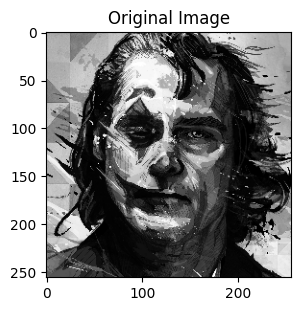

In [116]:
original_image = cv2.resize(cv2.imread('Joker.jpg', 0), (256, 256))
plot_image(original_image, "Original Image", 1)

### Adding Salt & Pepper Noise to the Original Image

10.19

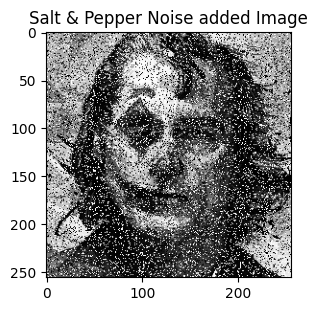

In [117]:
noisy_image = salt_pepper_noise(original_image, 9999)
plot_image(noisy_image, "Salt & Pepper Noise added Image", 2)
psnr(original_image, noisy_image)

### Applying Harmonic Mean Filter

8.04

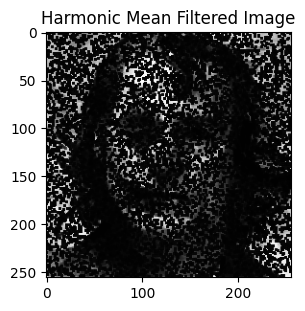

In [118]:
harmonic_mean_filtered_image = harmonic_mean_filter(noisy_image, 3)
plot_image(harmonic_mean_filtered_image, "Harmonic Mean Filtered Image", 3)
psnr(original_image, harmonic_mean_filtered_image)

### Applying Geometric Mean Filter

6.39

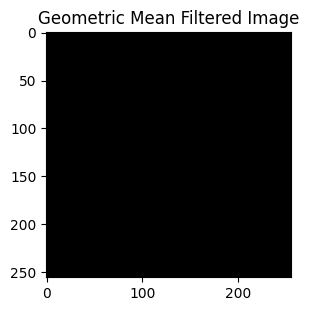

In [119]:
geometric_mean_filtered_image = geometric_mean_filter(noisy_image, 3)
plot_image(geometric_mean_filtered_image, "Geometric Mean Filtered Image", 4)
psnr(original_image, geometric_mean_filtered_image)